In [1]:
from __future__ import (division, print_function)

In [17]:
%autoreload 2
%matplotlib inline

In [3]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [37]:
import matplotlib.pyplot as plt
import pandas as pd
import h5py
from collections import OrderedDict

In [9]:
import sys
sys.path.append("../")
import get_gal_centroids as getg
import plot_gal_prop as plotg
import extract_catalog as ext

In [6]:
data_f = h5py.File("../../data/Illustris-1_fof_subhalo" +
                   "_myCompleteHaloCatalog_00135.hdf5")
h5_fstream = h5py.File("../../data/test_DM_KDE_fhat_129.h5", "r")
peaks_df = pd.read_hdf("../../data/test_DM_peak_129.h5", "peak_df")

In [28]:
metakeys = getg.metakeys()

In [49]:
gp_by = peaks_df.groupby(metakeys)
groups = OrderedDict(list(gp_by))

In [56]:
fhat_dict = OrderedDict({gp_keys: 
             getg.retrieve_fhat_from_gp(gp_keys, gp_vals, h5_fstream)
             for gp_keys, gp_vals in groups.iteritems()
             })

/Users/karenyng/Documents/illustris_analyses/code/IlEnv/lib/python2.7/site-packages/matplotlib/pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


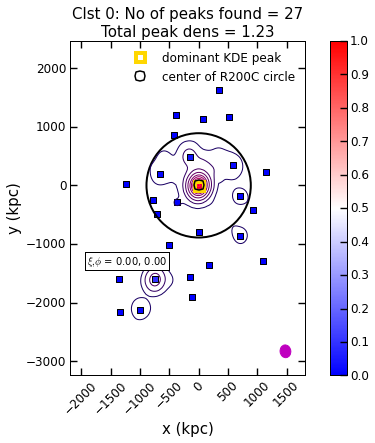

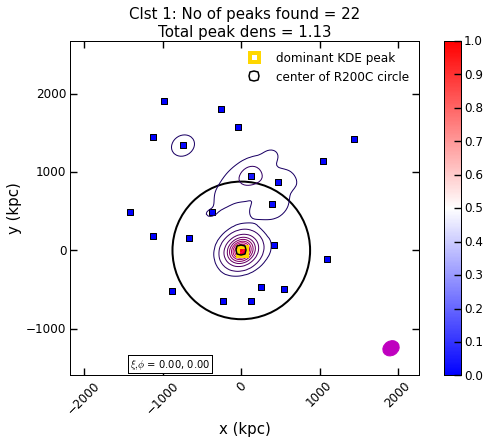

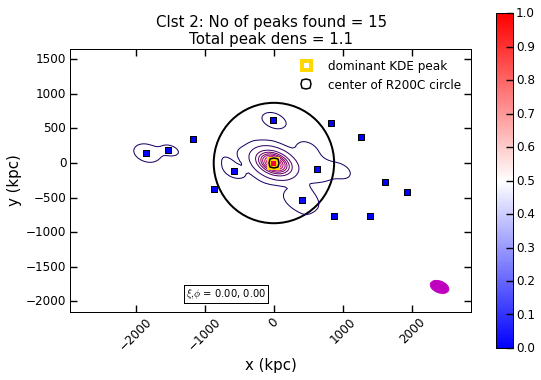

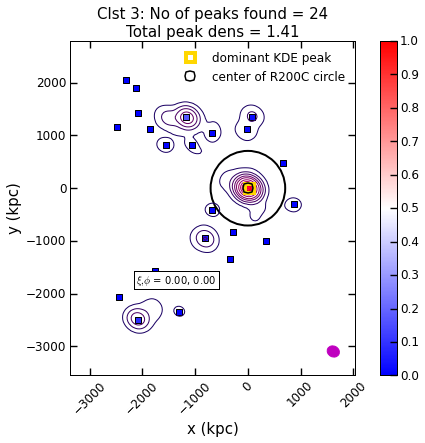

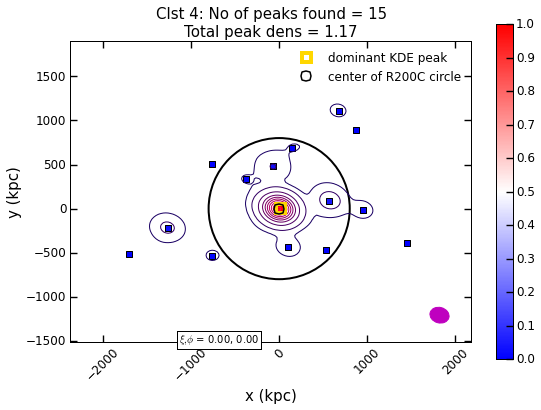

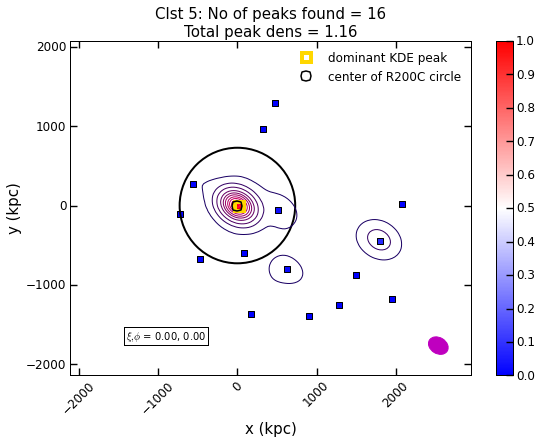

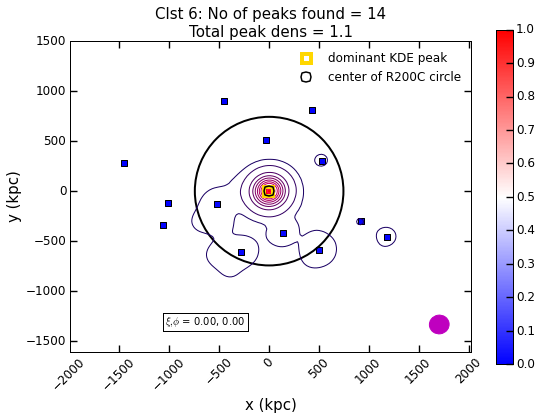

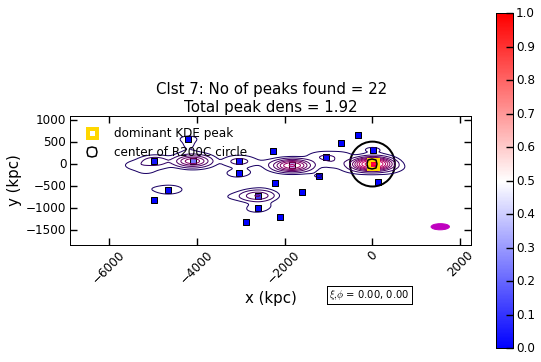

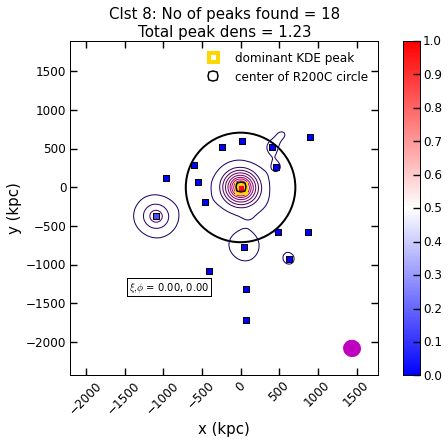

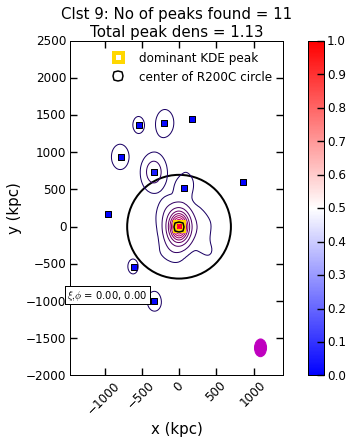

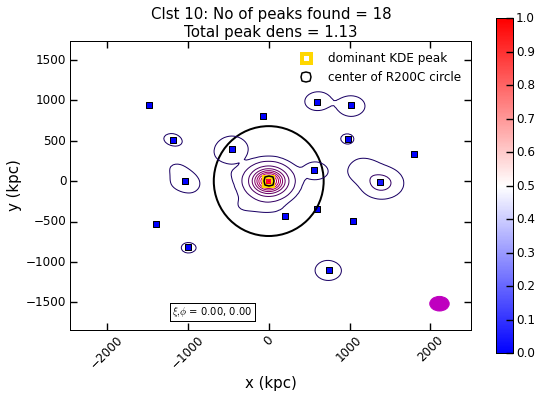

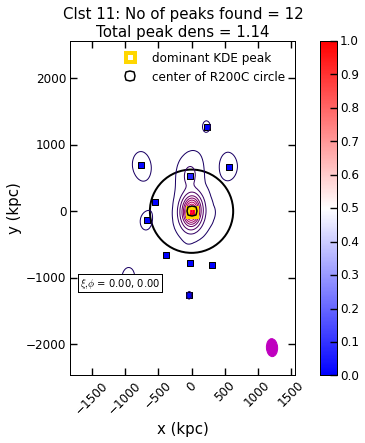

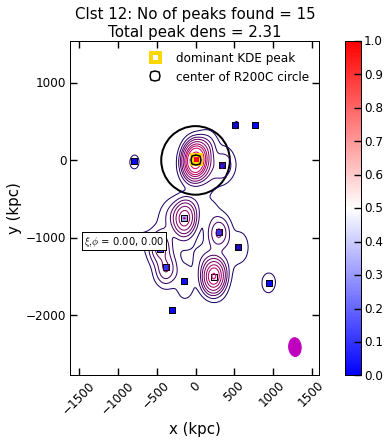

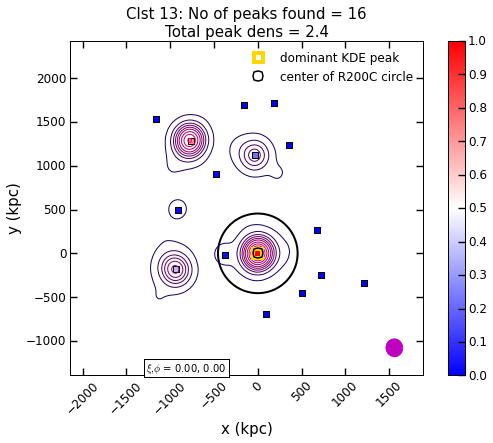

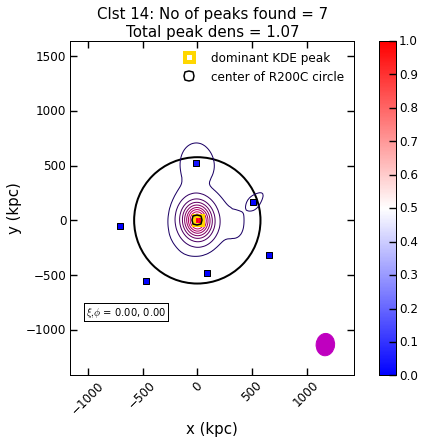

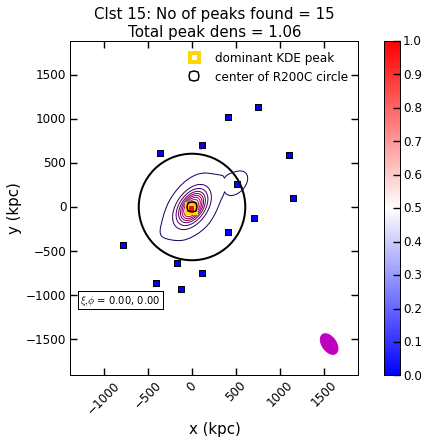

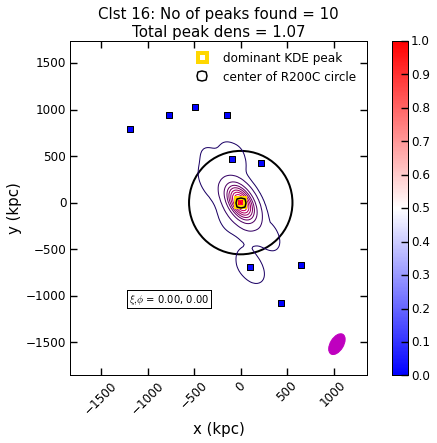

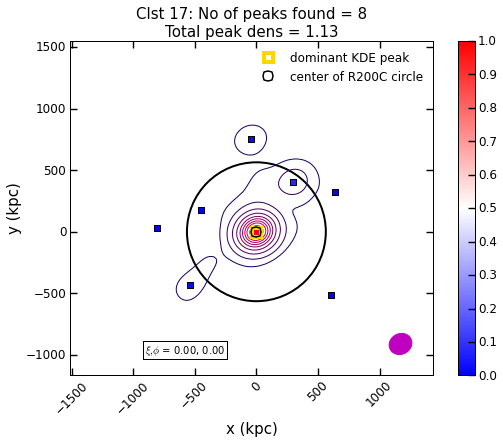

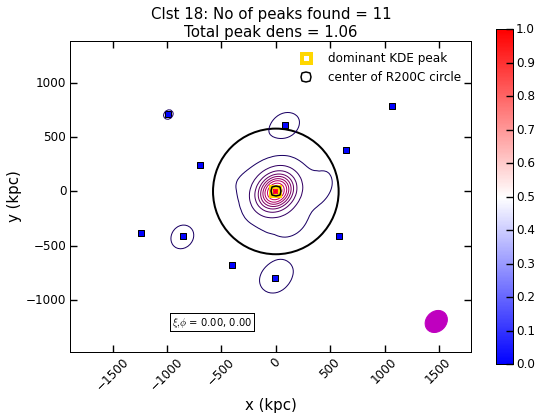

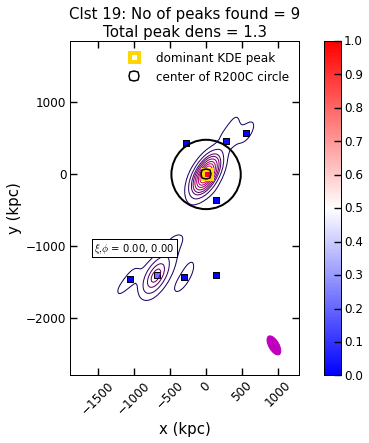

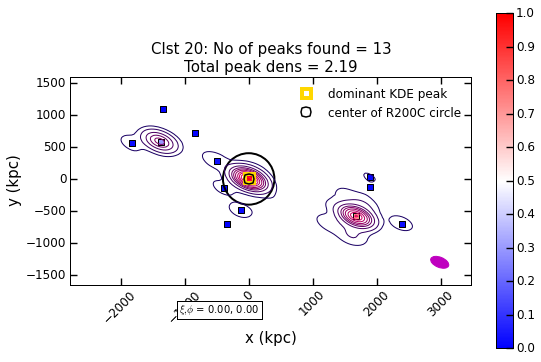

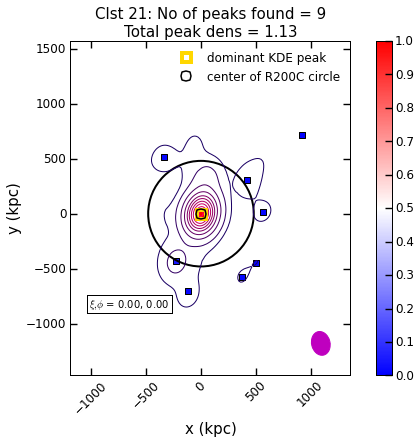

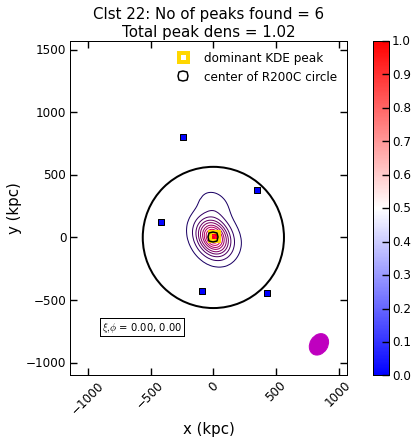

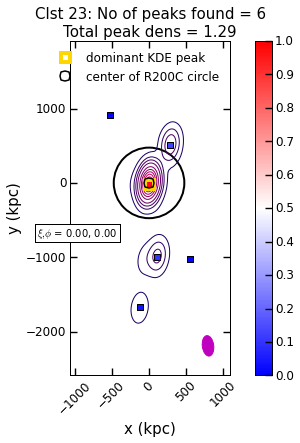

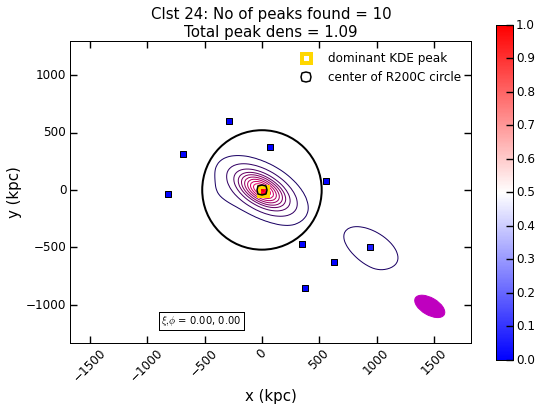

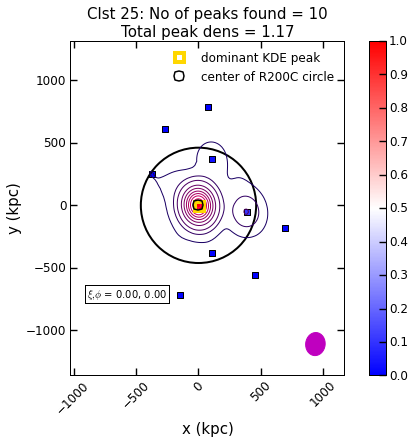

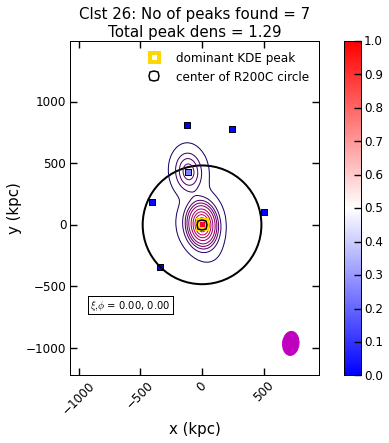

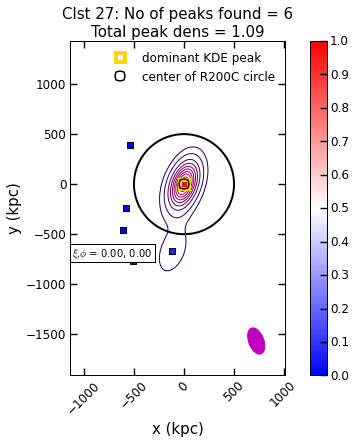

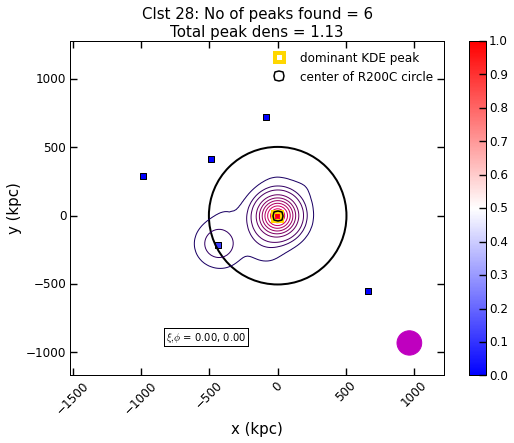

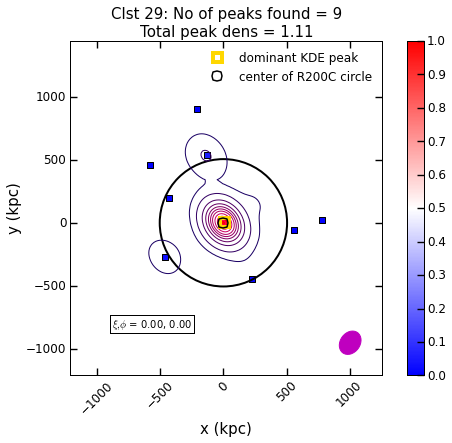

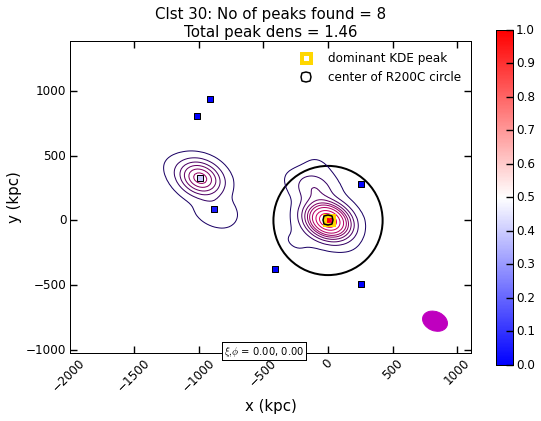

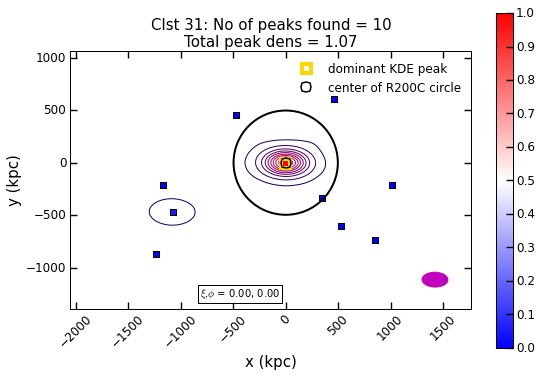

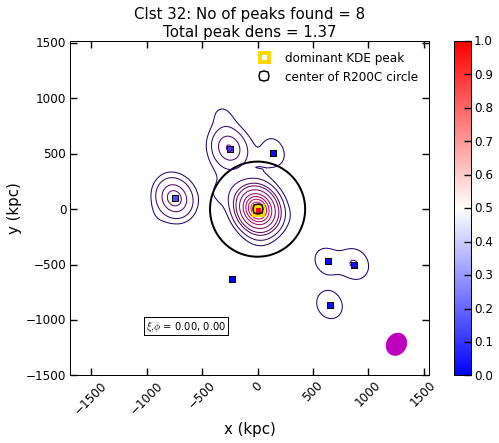

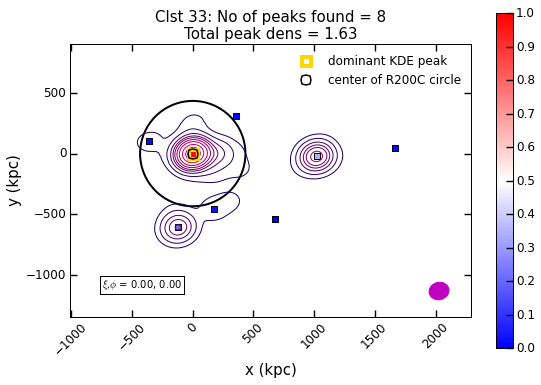

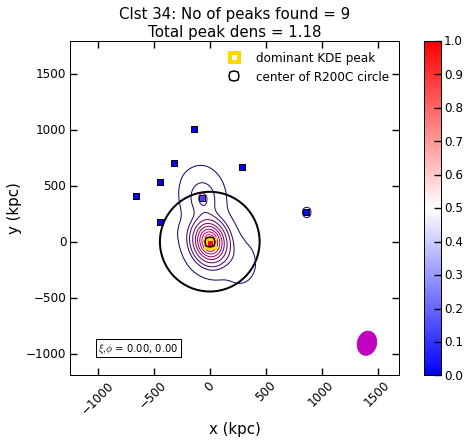

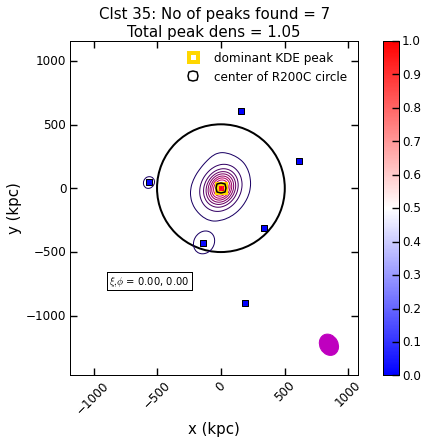

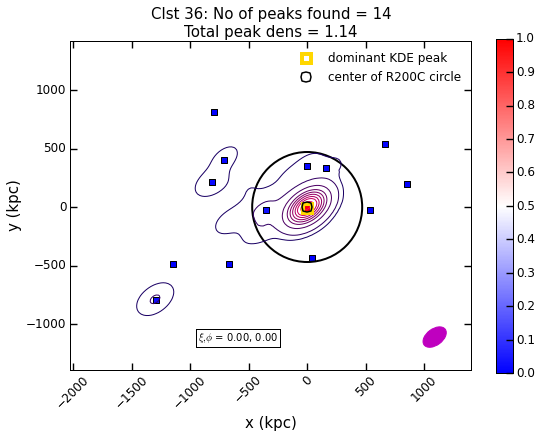

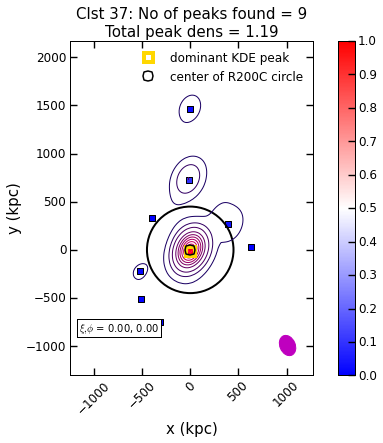

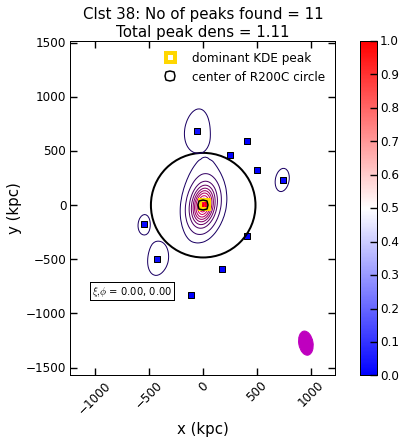

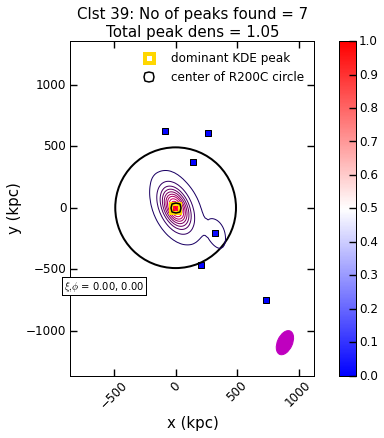

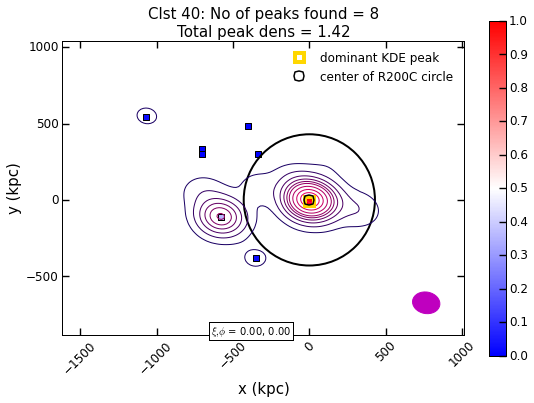

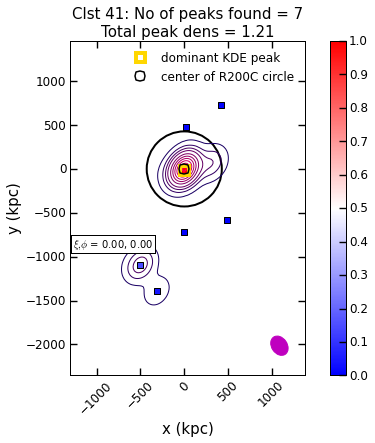

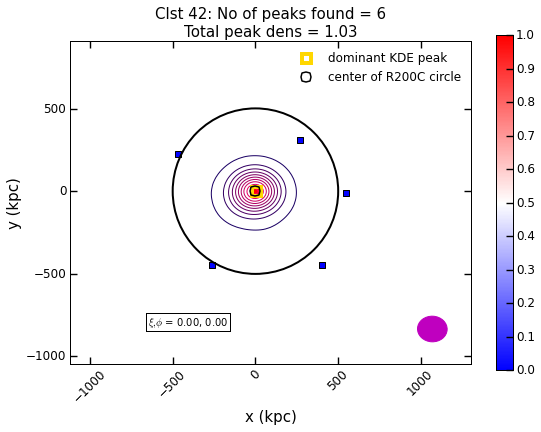

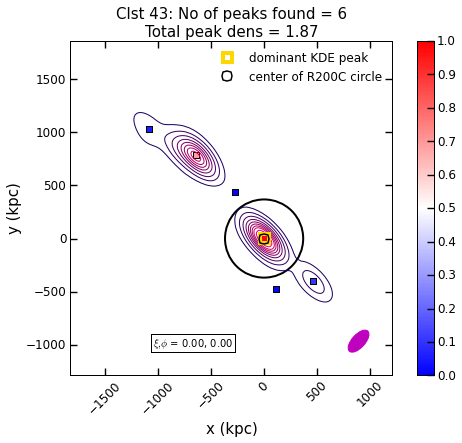

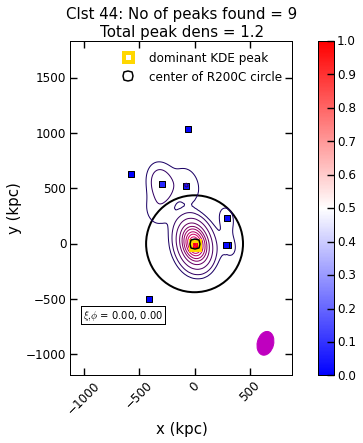

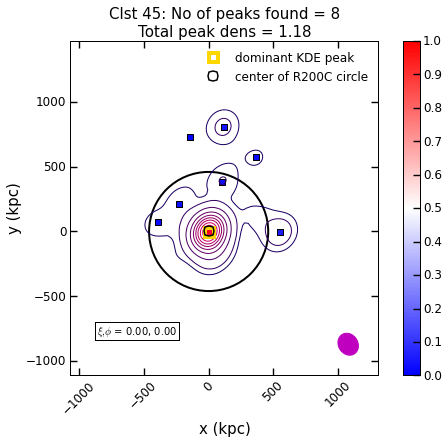

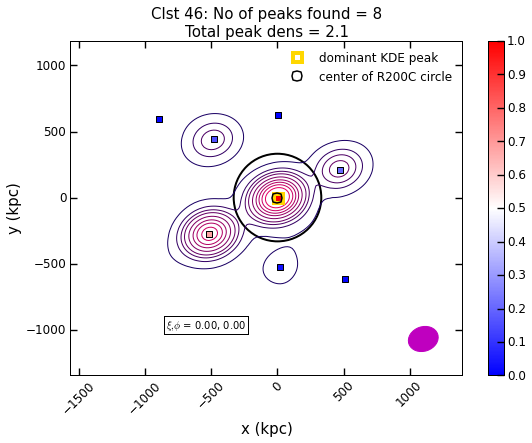

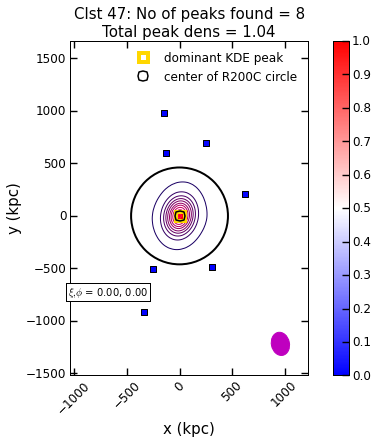

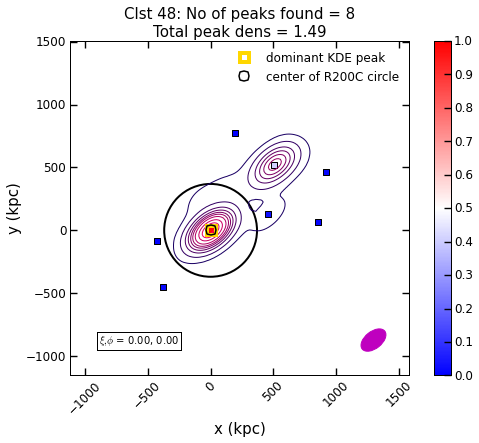

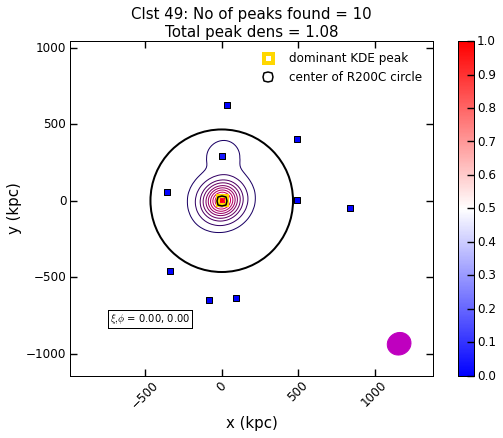

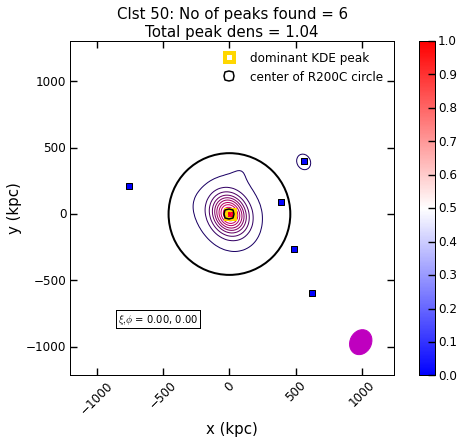

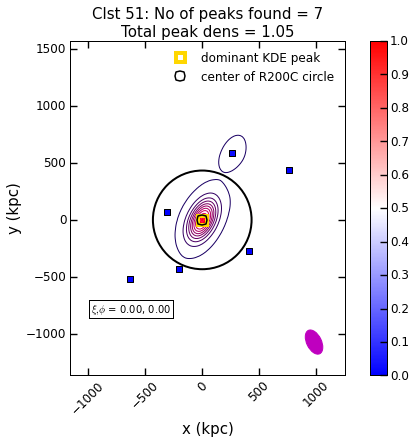

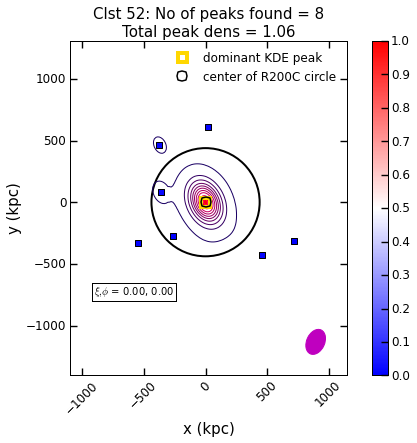

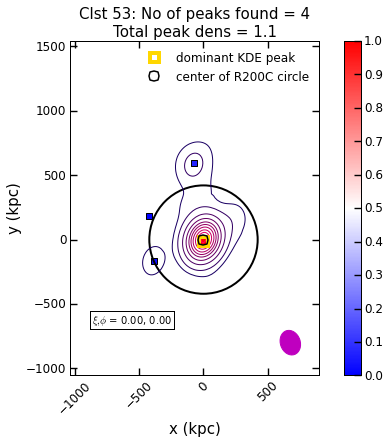

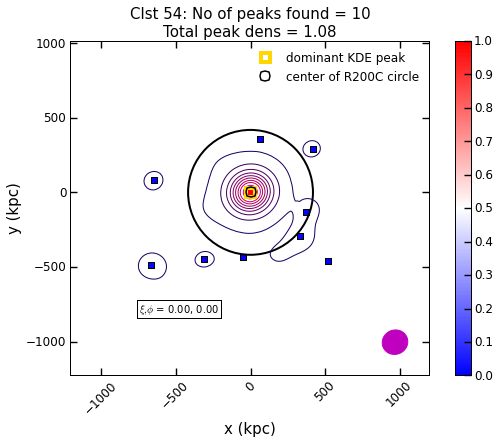

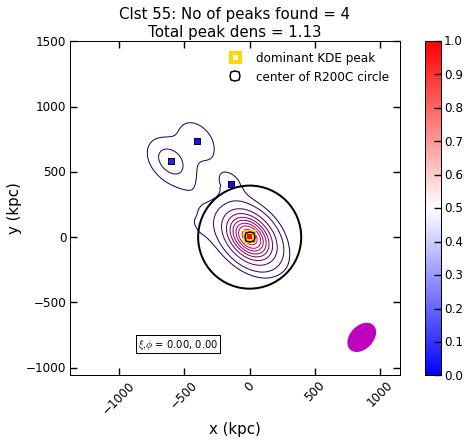

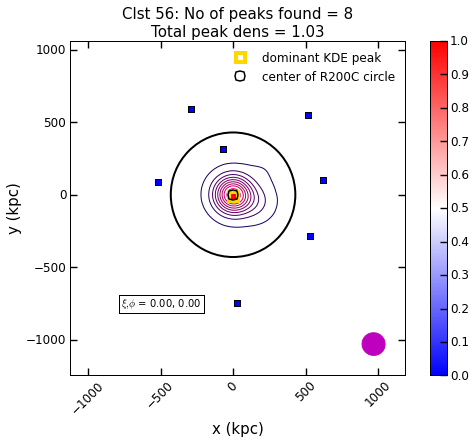

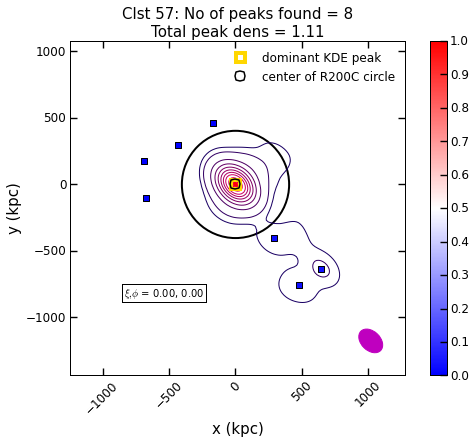

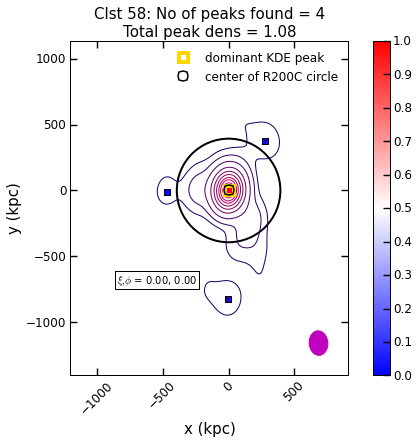

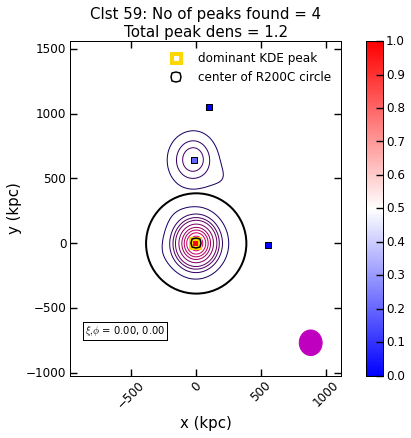

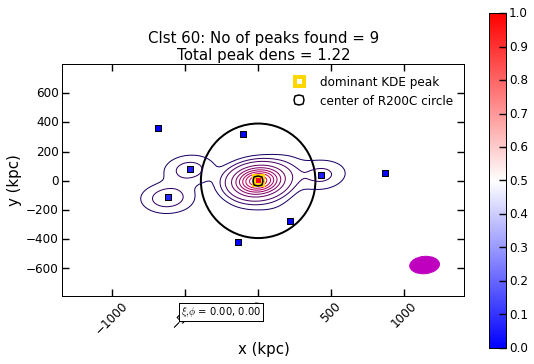

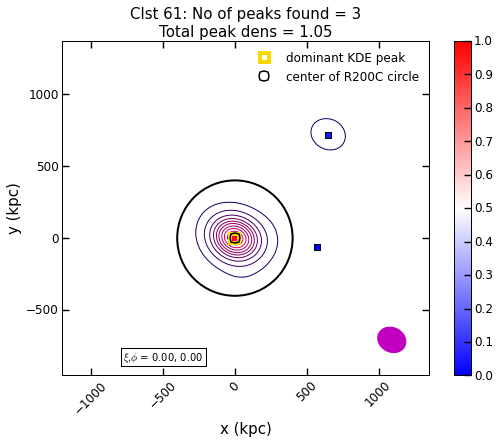

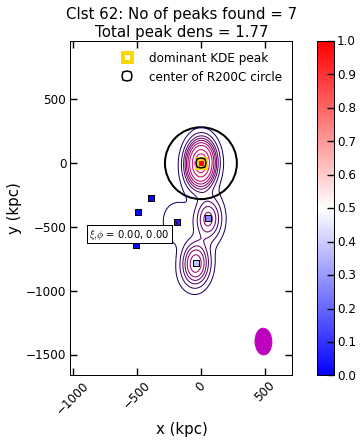

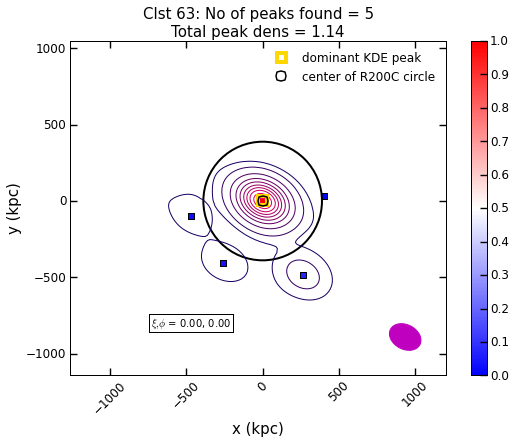

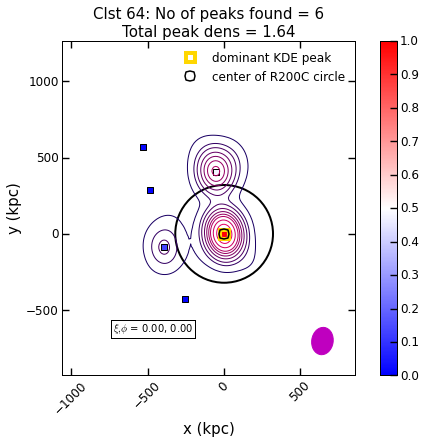

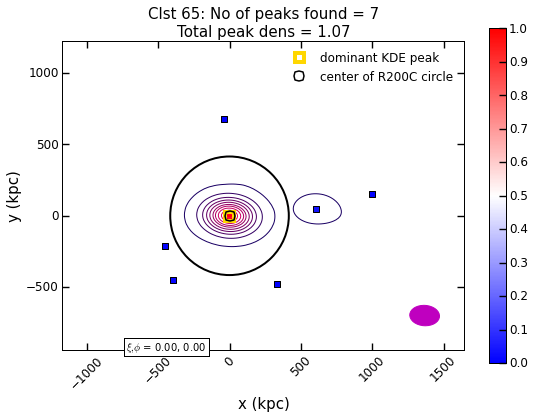

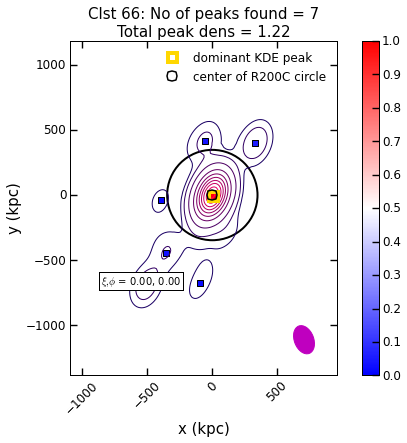

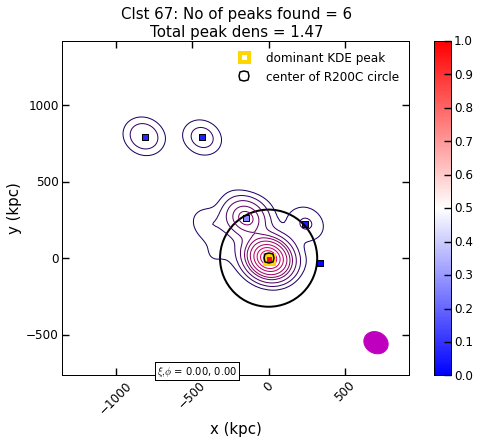

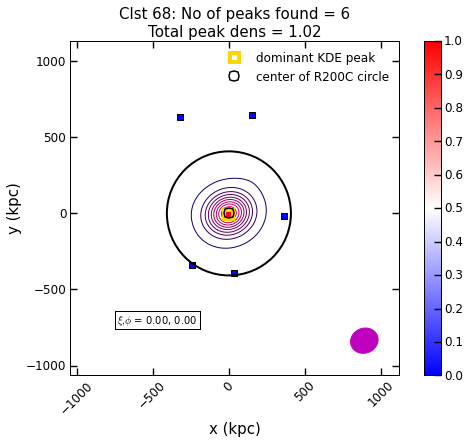

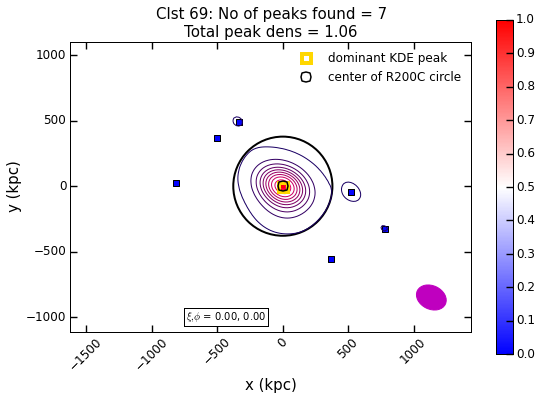

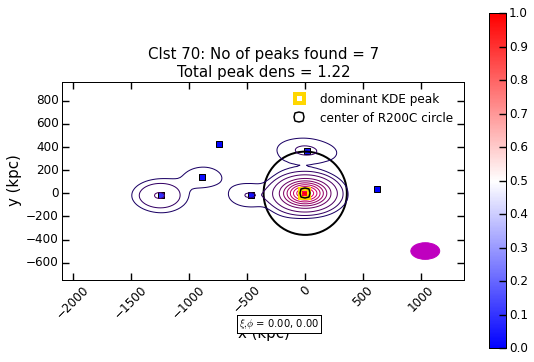

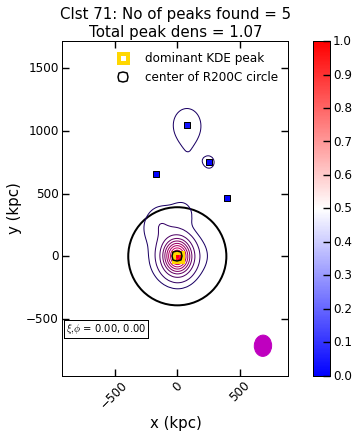

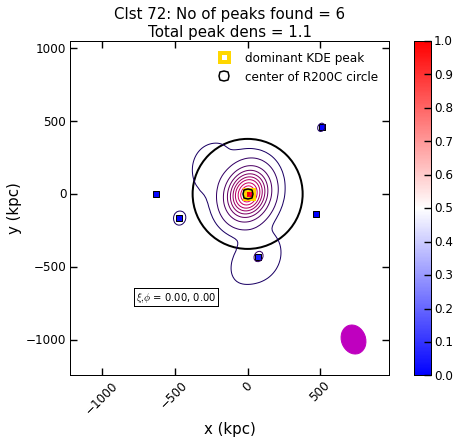

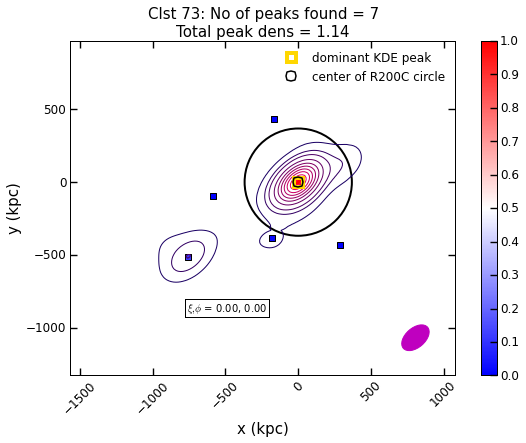

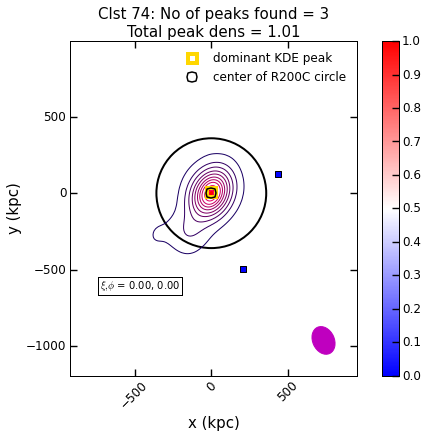

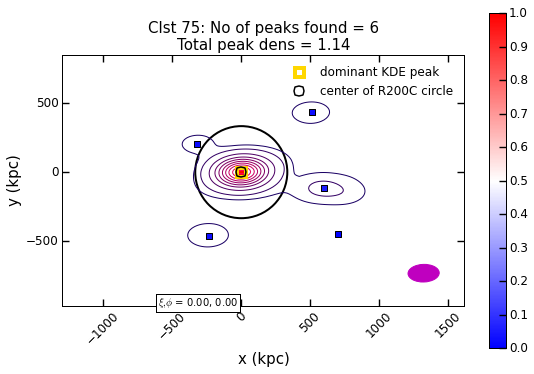

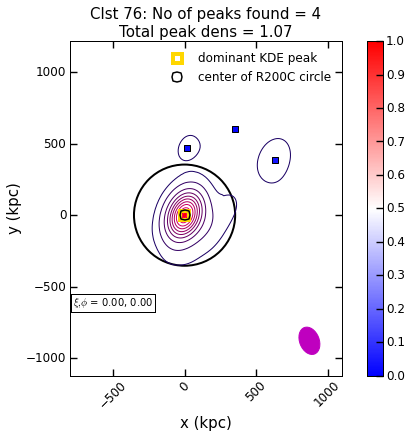

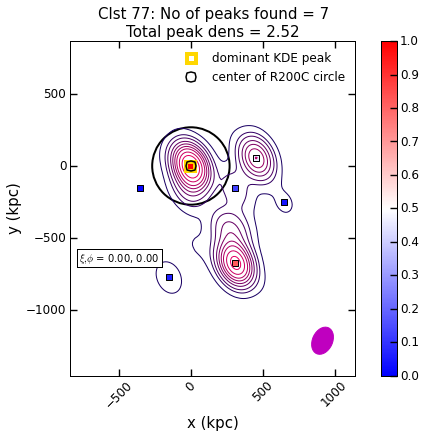

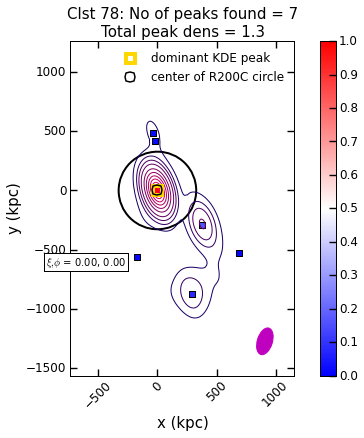

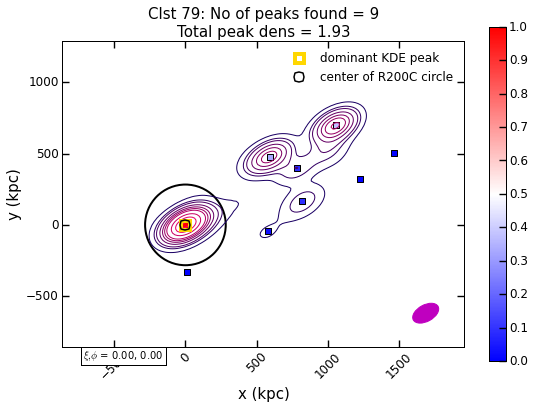

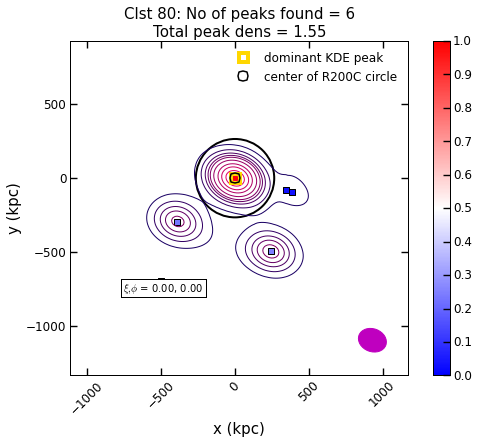

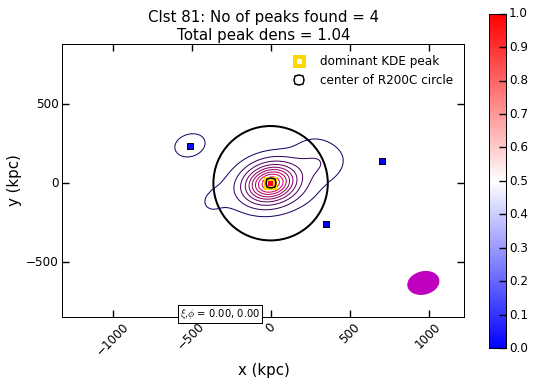

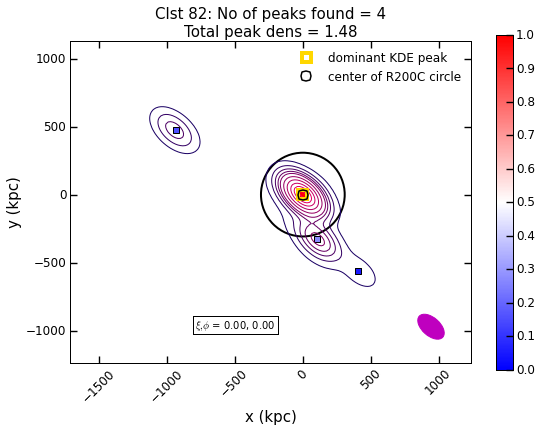

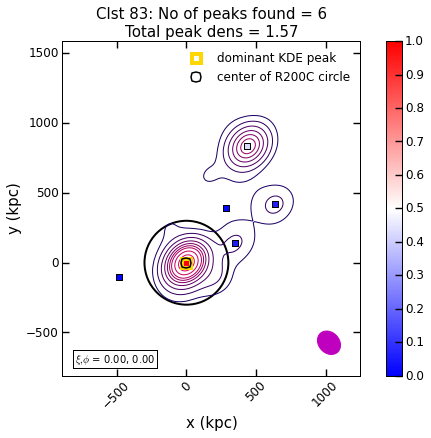

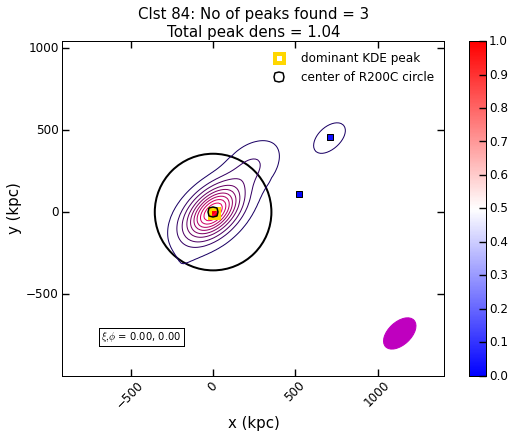

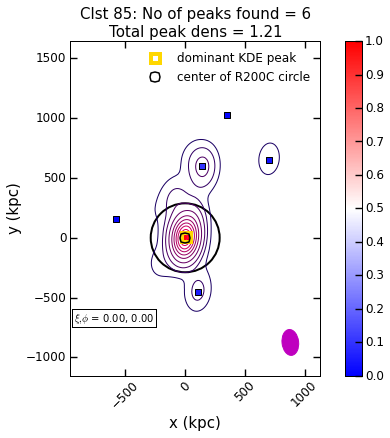

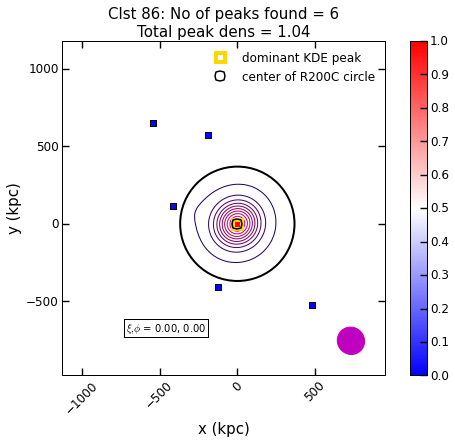

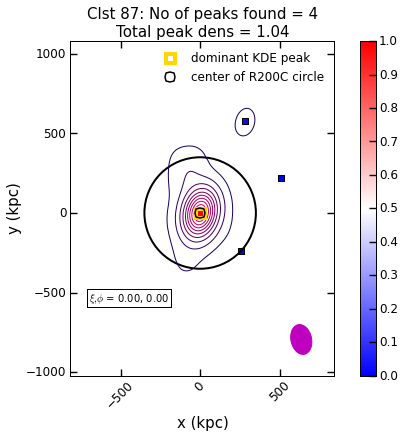

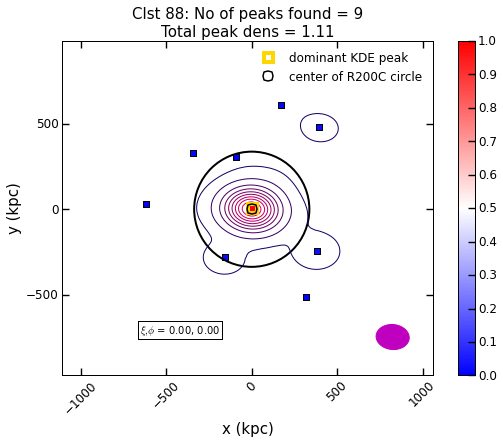

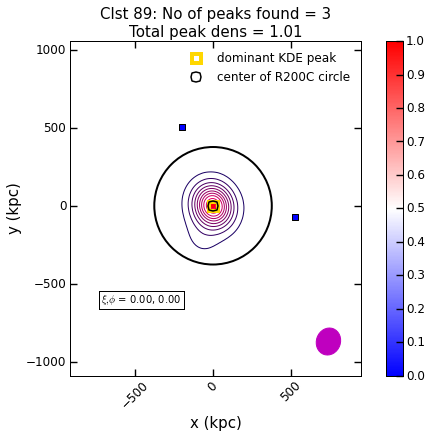

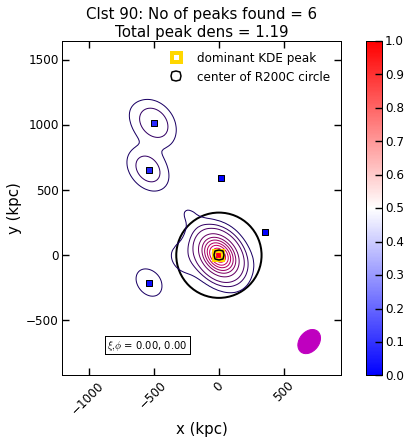

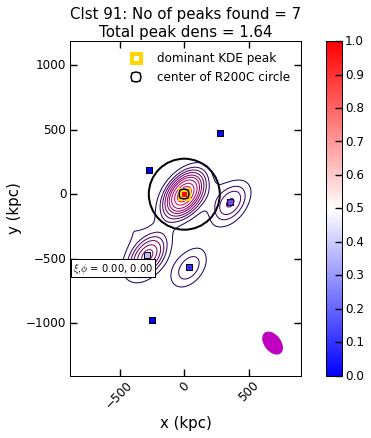

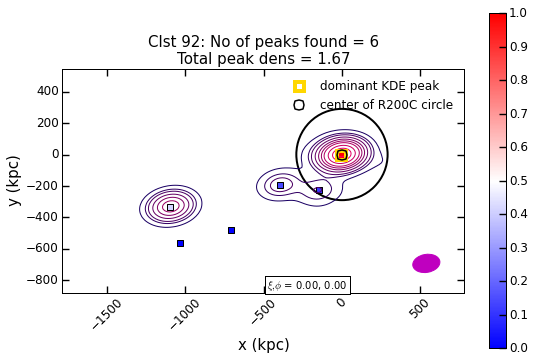

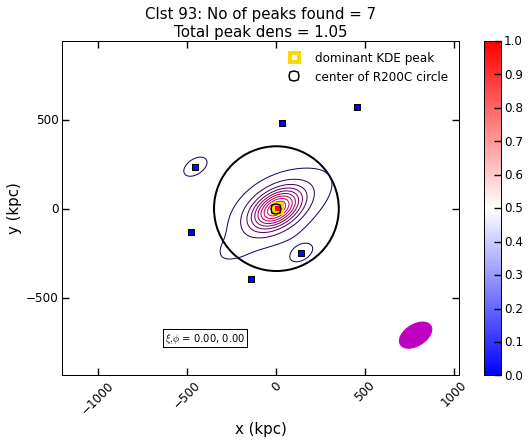

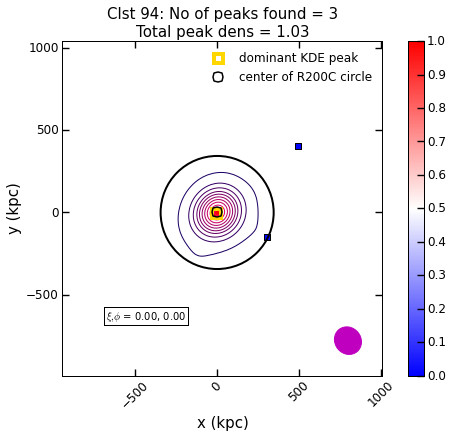

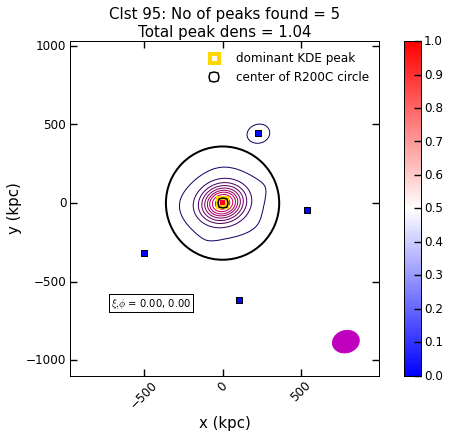

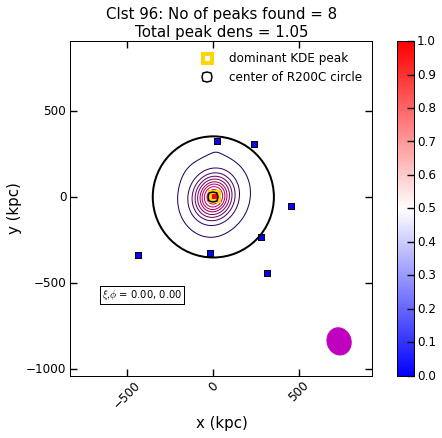

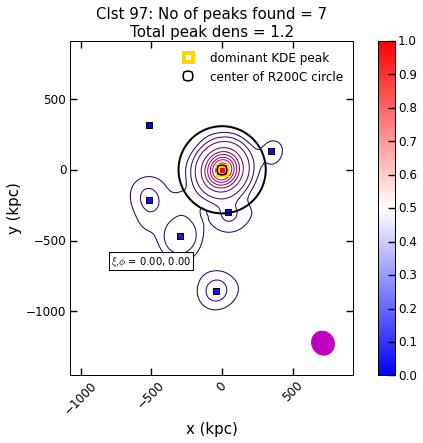

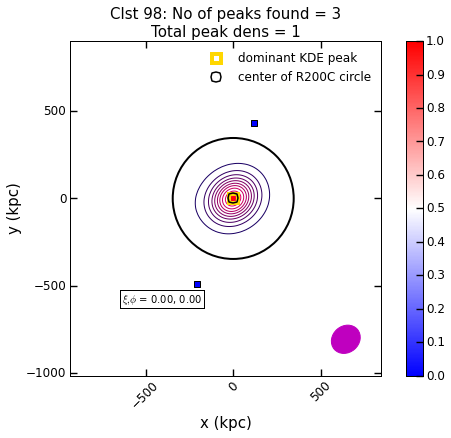

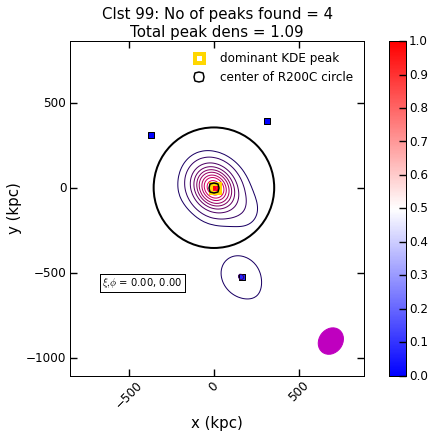

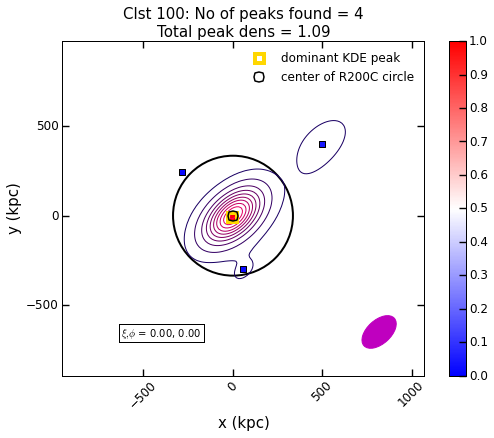

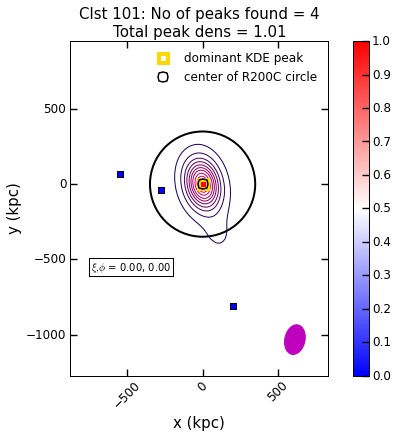

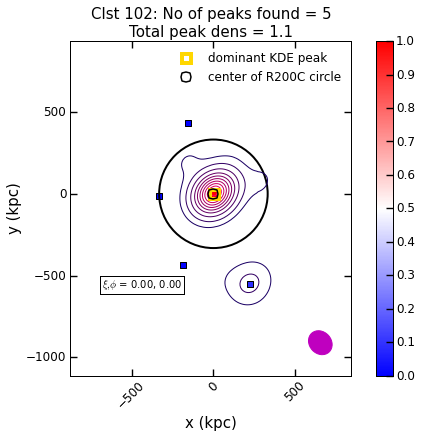

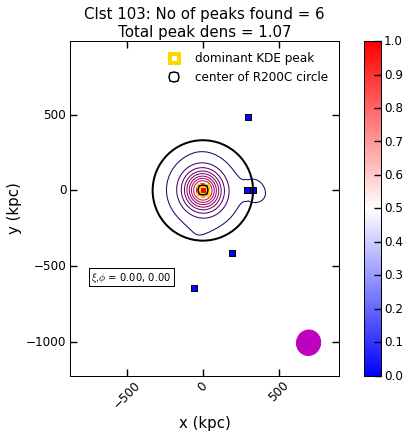

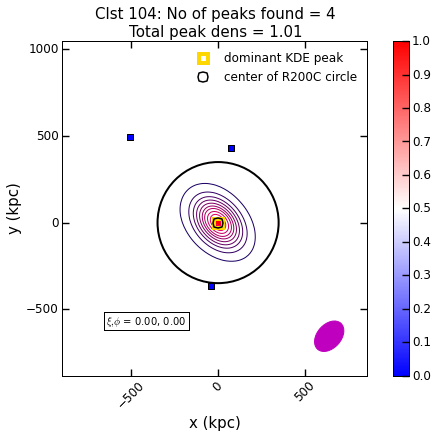

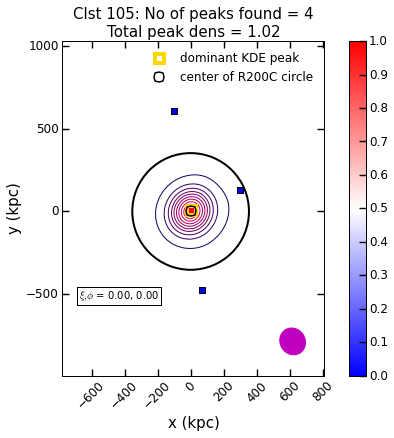

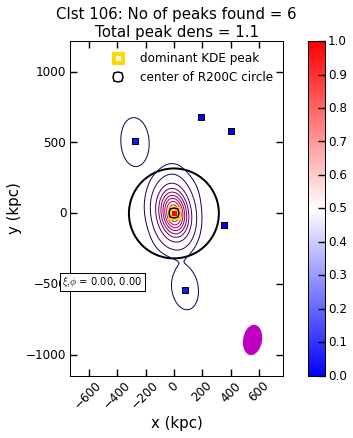

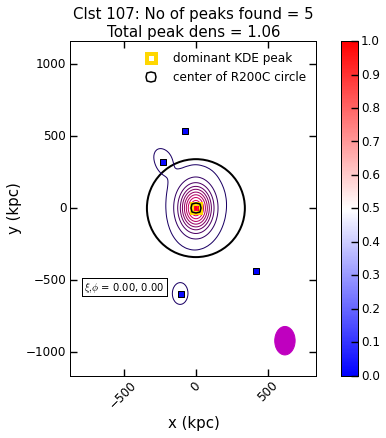

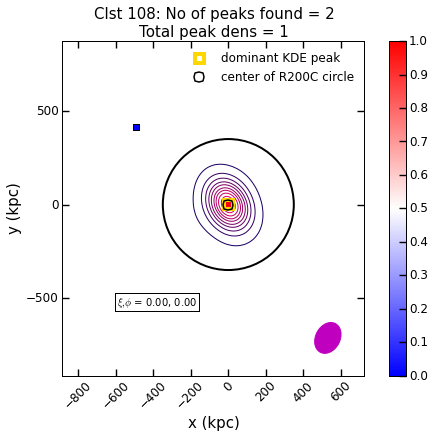

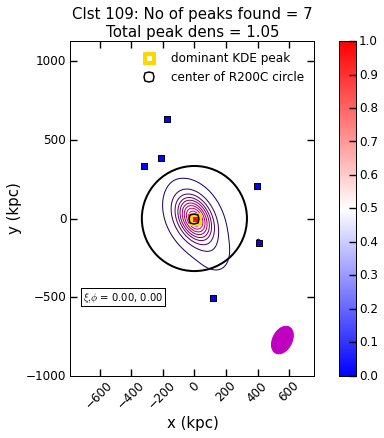

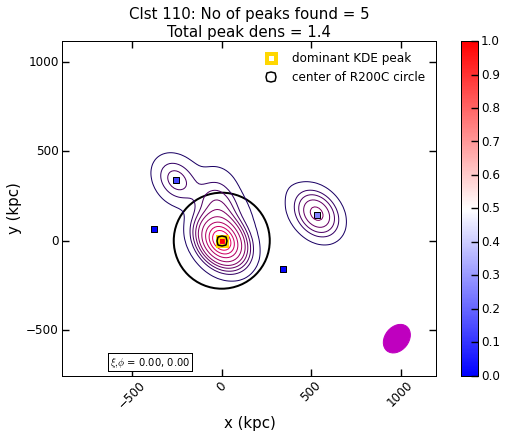

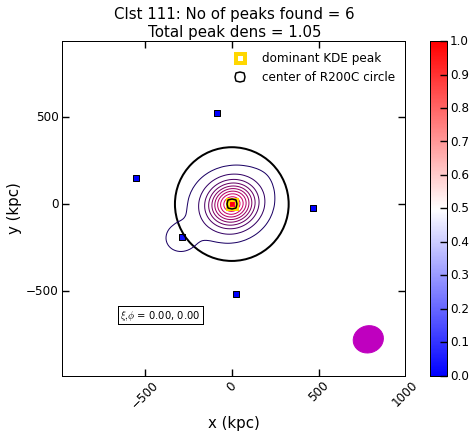

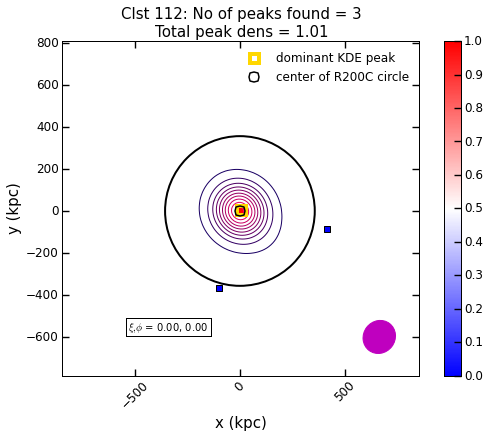

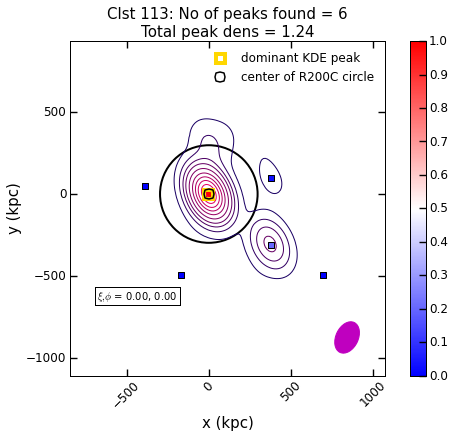

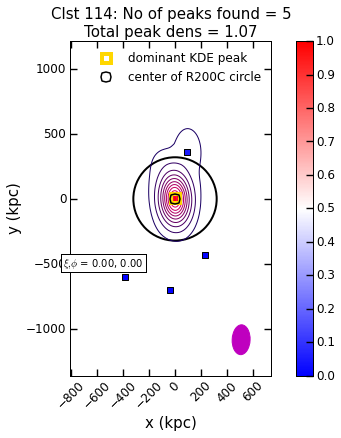

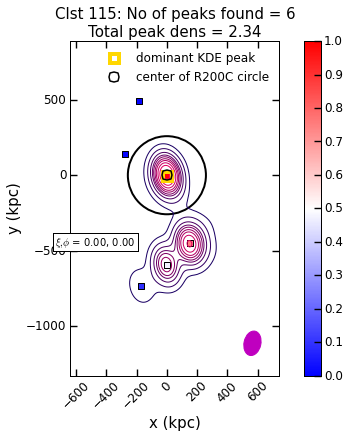

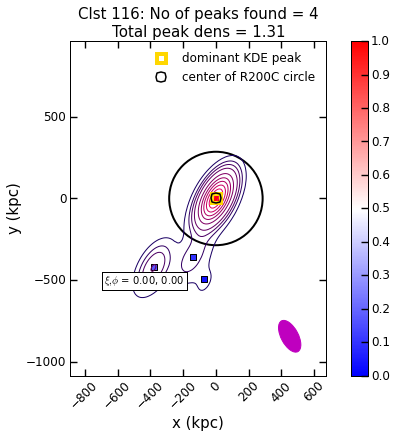

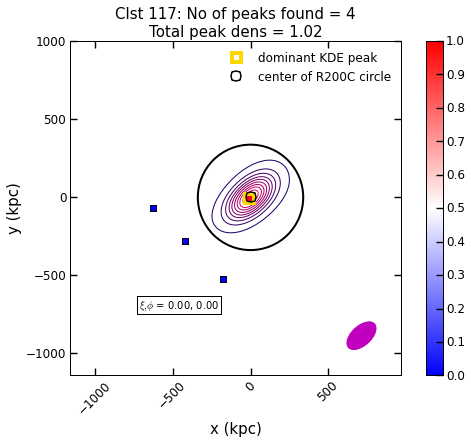

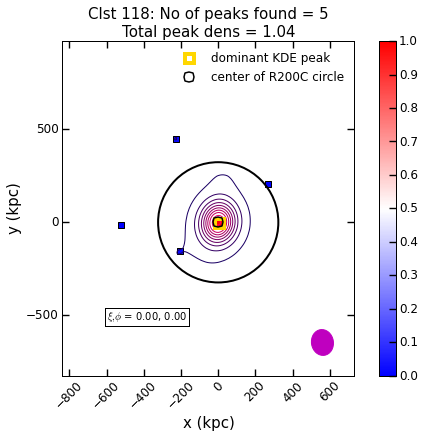

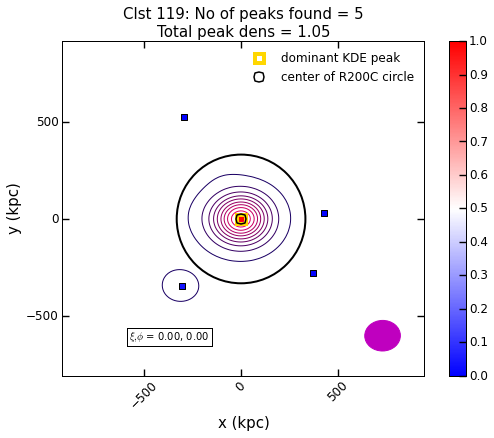

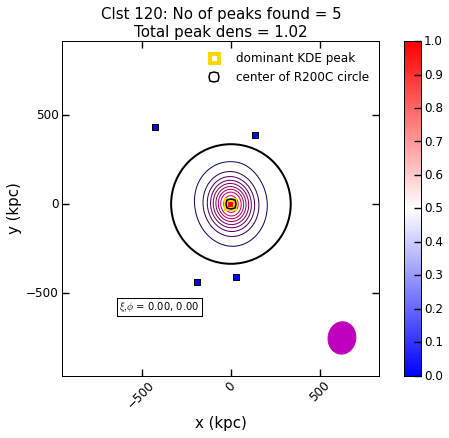

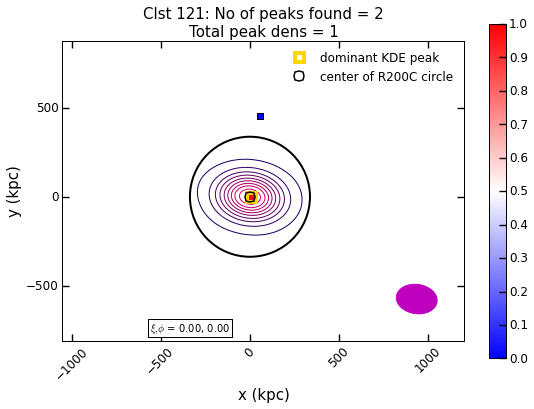

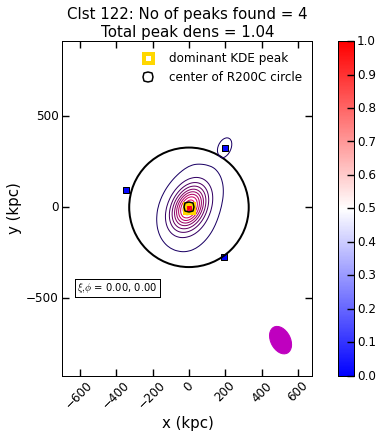

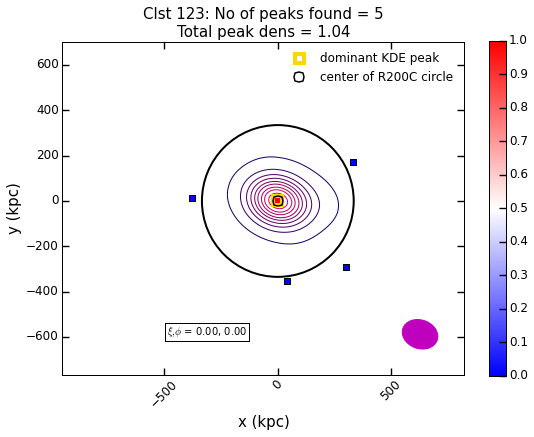

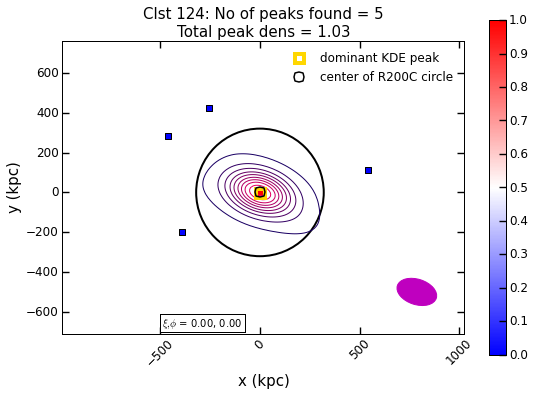

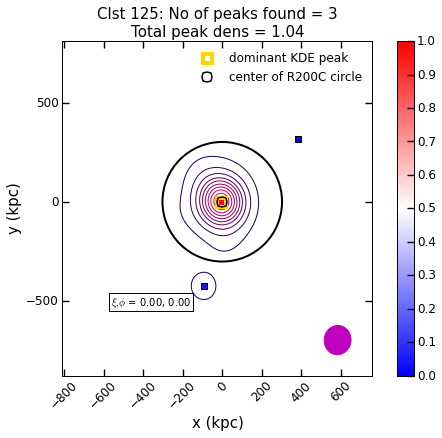

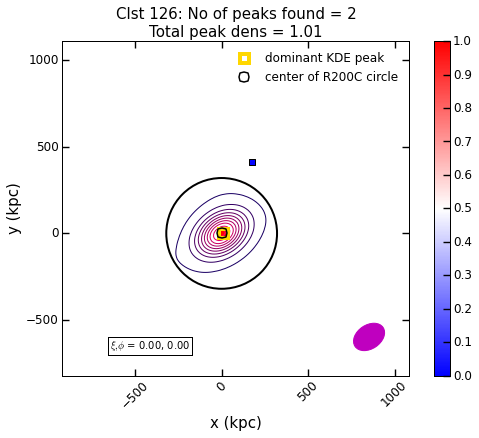

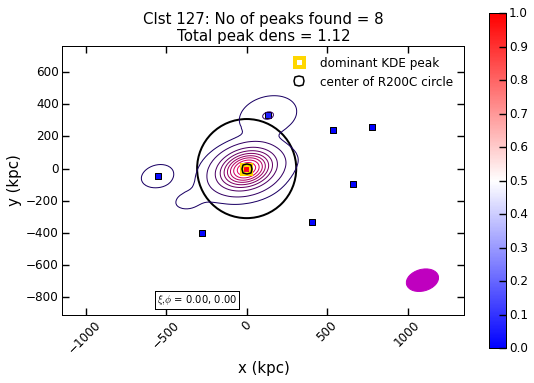

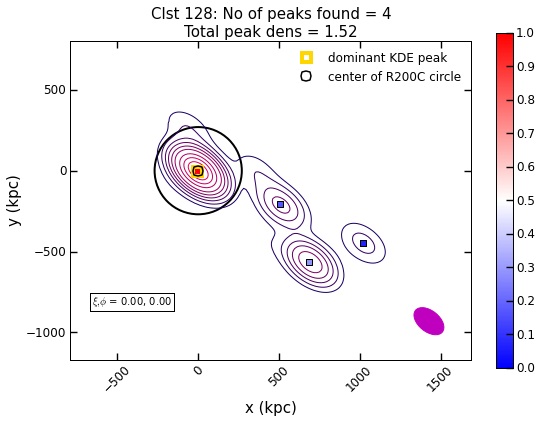

In [85]:
for key in groups.keys():
    clstNo = key[0]
    fig = plt.figure()
    
    ax = fig.add_subplot(111, aspect='equal')

    plotg.plot_KDE_peaks(fhat_dict[key], 
                         clstNo=clstNo,
                         allPeaks=True, 
                         R200C=data_f["Group"]['Group_R_Crit200'][clstNo],
                         ax=ax, fig=fig,
                         xlabel='x (kpc)',
                         ylabel='y (kpc)')
    fig.set_figheight(1.5 * fig.get_figheight())
    fig.set_figwidth(1.5 * fig.get_figwidth())
    
    figheight = np.abs(np.diff(ax.get_xlim()))
    figwidth = np.abs(np.diff(ax.get_ylim()))
    ax.text(-figwidth / 3., -figheight / 3., 
            r"$\xi, \phi$ = {:.2f}, {:.2f}".format(
            *((np.array(key[-2:]) * 180. / np.pi)), size=50)
            , bbox=dict(facecolor='white'))
    #for tick in ax.get_xticklabels():
    #    tick.set_rotation(45)
    map(lambda x: x.set_rotation(45), ax.get_xticklabels())